In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_files

In [4]:
config = get_config.read_yaml()

In [5]:
ticker = config['data'][config['data']['selected_tickers']][0]
ticker

'ADANIENT.NS'

In [6]:
data = read_files.read_raw_training_data(ticker)
data

Reading Raw Training data: ADANIENT !
Successfully read: ADANIENT !


,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-16,63.500011,64.271144,62.700045,63.435146,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000
2014-12-17,63.125256,63.932433,61.546946,63.146880,10603088,-0.005919,0.985265,0.991114,0.005849,0.590167
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654884,66.231435,65.373812,65.373812,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094


In [7]:
ticker

'ADANIENT.NS'

In [8]:
cols = [col for col in data.columns]
cols

['Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'Returns',
 'B&H Returns',
 'B&H Max',
 'B&H Drawdown',
 'B&H Drawdown %']

In [9]:
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

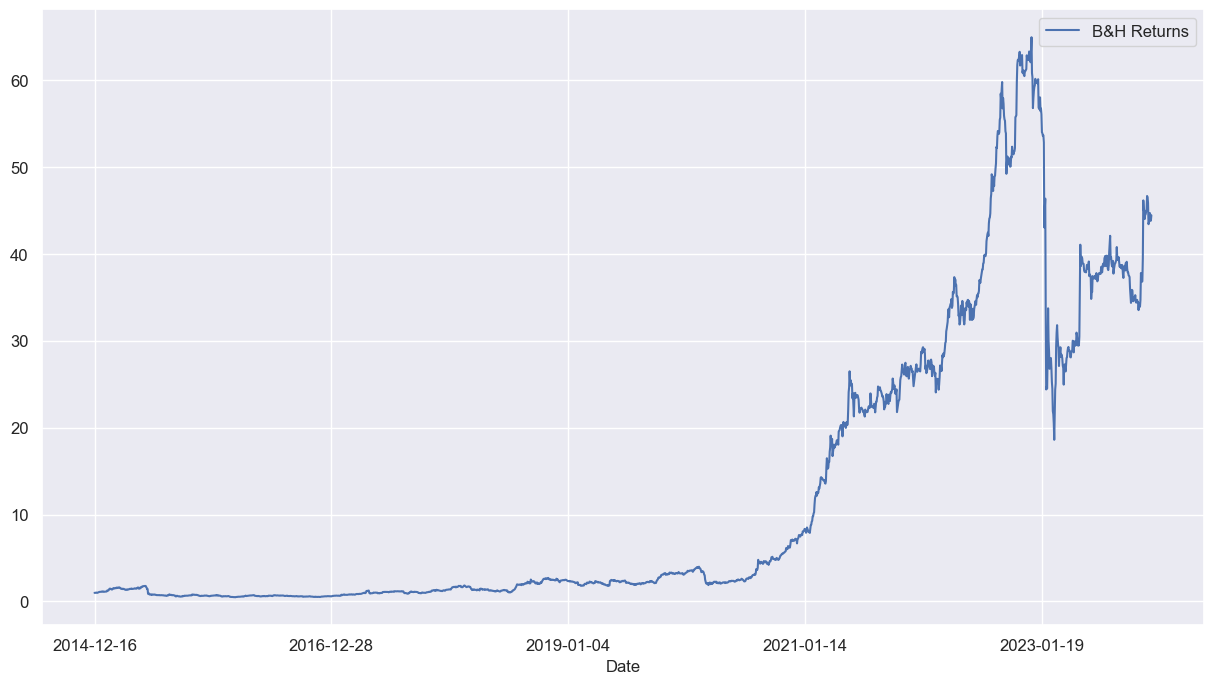

In [11]:
plot_df(data['B&H Returns'])

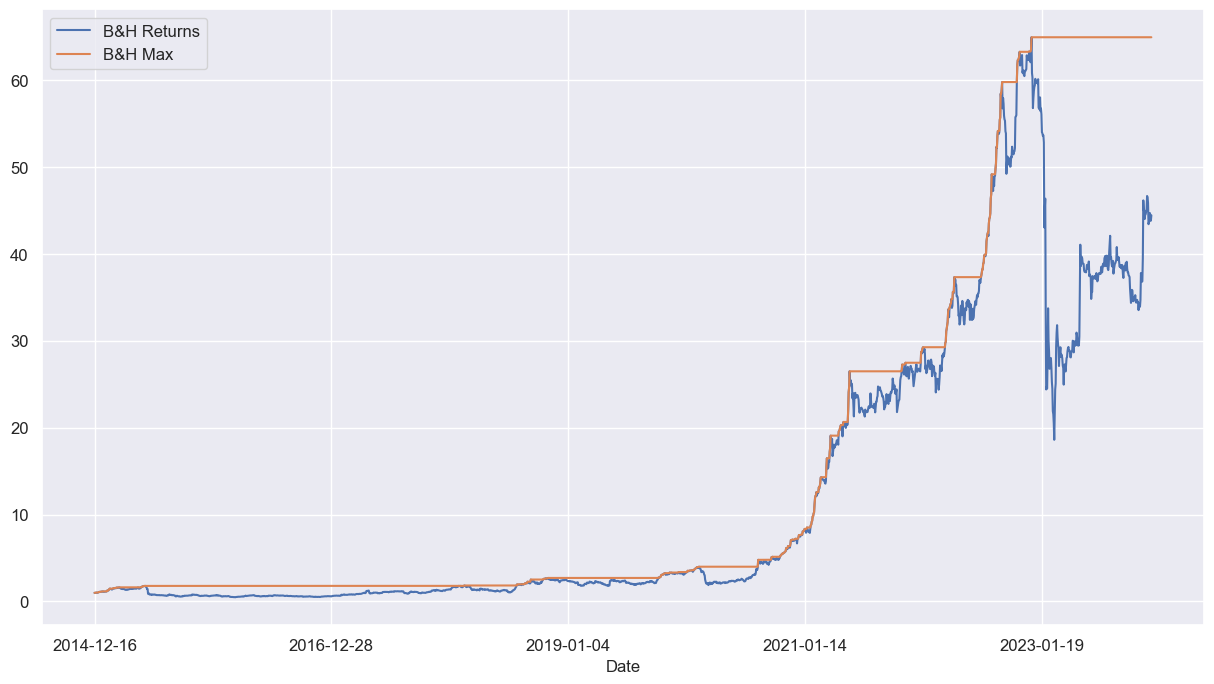

In [12]:
plot_df(data.loc[:, ['B&H Returns', 'B&H Max']])

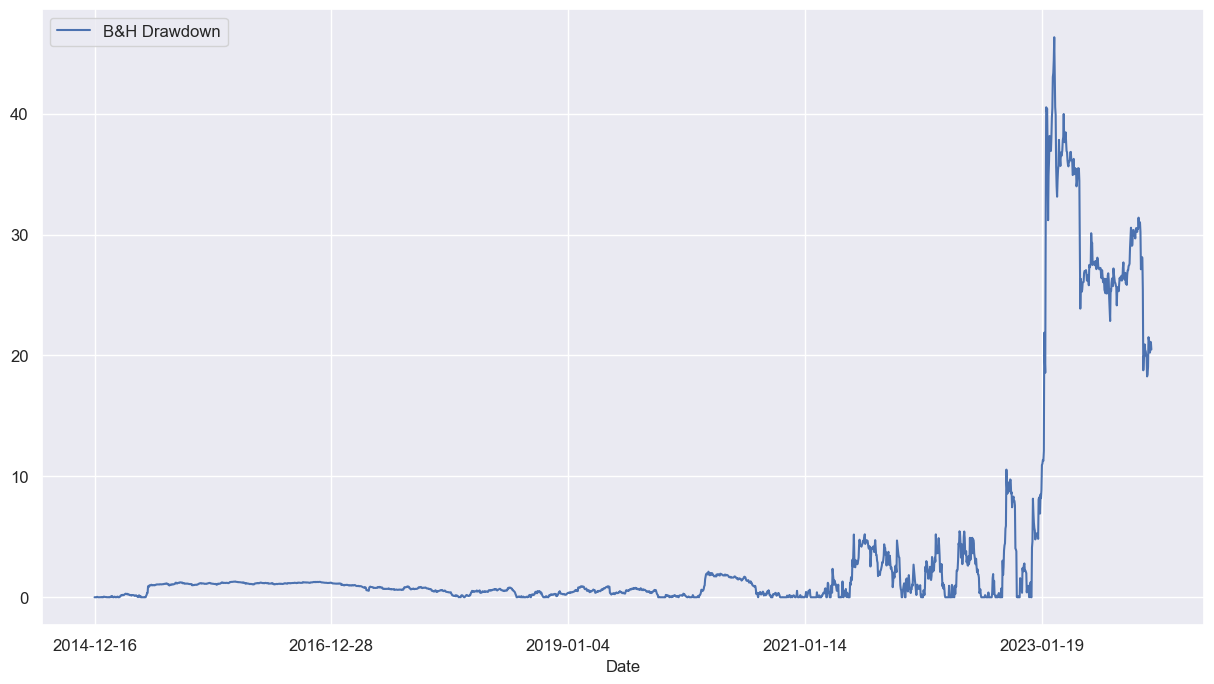

In [14]:
plot_df(data.loc[:, ['B&H Drawdown']])

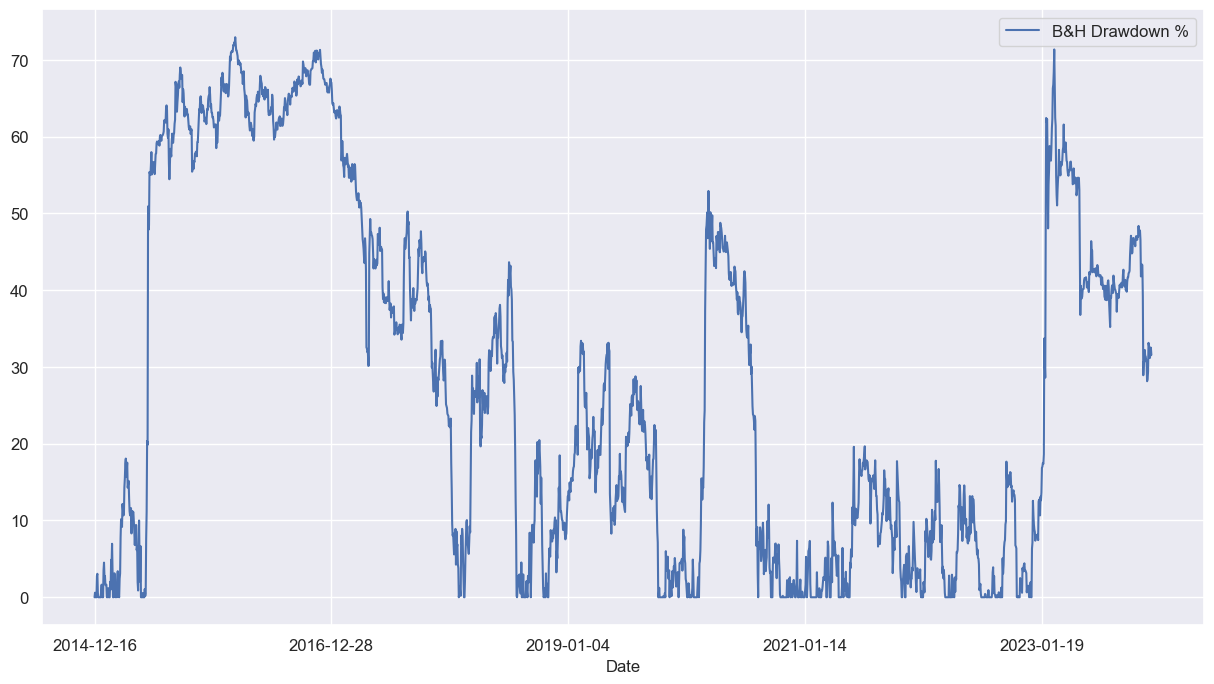

In [15]:
plot_df(data.loc[:, ['B&H Drawdown %']])

In [16]:
data['Signal'] = np.where(data['Close']>data['Open'], -1, 1)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Signal
Date,,,,,,,,,,,
2014-12-16,63.500011,64.271144,62.700045,63.435146,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000,-1
2014-12-17,63.125256,63.932433,61.546946,63.146880,10603088,-0.005919,0.985265,0.991114,0.005849,0.590167,1
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,-1
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,-1
2014-12-22,65.654884,66.231435,65.373812,65.373812,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789,1
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259,-1
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094,1


In [17]:
data['Position'] = data['Signal'].shift(1) * data['Returns']
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Signal,Position
Date,,,,,,,,,,,,
2014-12-16,63.500011,64.271144,62.700045,63.435146,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000,-1,NaN
2014-12-17,63.125256,63.932433,61.546946,63.146880,10603088,-0.005919,0.985265,0.991114,0.005849,0.590167,1,0.005919
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,-1,0.017541
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,-1,-0.014478
2014-12-22,65.654884,66.231435,65.373812,65.373812,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,-1,-0.007271
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789,1,-0.003067
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259,-1,0.020128
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094,1,0.007742


In [19]:
data.dropna(inplace = True)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Signal,Position
Date,,,,,,,,,,,,
2014-12-17,63.125256,63.932433,61.546946,63.146880,10603088,-0.005919,0.985265,0.991114,0.005849,0.590167,1,0.005919
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,-1,0.017541
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,-1,-0.014478
2014-12-22,65.654884,66.231435,65.373812,65.373812,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,-1,-0.007271
2014-12-23,63.824329,66.058469,63.420744,65.734163,5658813,-0.028278,0.996176,1.024747,0.028571,2.788147,1,0.028278
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789,1,-0.003067
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259,-1,0.020128
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094,1,0.007742


In [20]:
np.exp(data['Position'].sum())

np.float64(0.03953943718490954)